In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scheme = {'blue':'#2f788e', 'red':'#d15b4f', 'green':'#45b563', 'grey':'#8a8888'}

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [4]:
df_strc = pd.read_csv('../../datasets/datasets_prepped/strc_km.csv', usecols=['cpm', 'varseq'])
df_ctrl = pd.read_csv('../../datasets/datasets_prepped/ctrl_km.csv', usecols=['cpm', 'varseq'])

In [5]:
aurora2 = 'GGAAGGGATGACTATGTCCGGTTCCTGTAAGGCATGTGGAGTGTTGT'

In [6]:
thresholds = [10**x for x in [-1, 0, 1, 2]]

In [7]:
df_res = []

In [8]:
for t in thresholds:
    strc_count = len(df_strc[df_strc['cpm'] >= t])
    ctrl_count = len(df_ctrl[df_ctrl['cpm'] >= t])
    df_res.append([strc_count, ctrl_count])

In [9]:
df_res = pd.DataFrame(df_res, columns=['structured', 'random'], index=thresholds)

In [10]:
df_res

,structured,random
0.1,1910646,2039565
1.0,50539,141951
10.0,6585,117
100.0,245,12


In [11]:
xticklabels = ['0.1', '1', '10', '100']
x = np.array([x for x in range(0, len(df_res))])

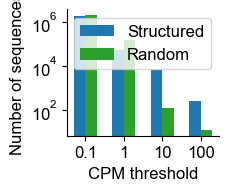

In [12]:
width=0.3

fig, ax = plt.subplots()
g1 = ax.bar(x - width/2, df_res['structured'], width, label='Structured', color='tab:blue')
g2 = ax.bar(x + width/2, df_res['random'], width, label='Random', color='tab:green')
plt.xticks(x, xticklabels)
plt.yscale('log')
set_size(1.9, 1.6)
plt.xlabel('CPM threshold')
plt.ylabel('Number of sequences')
plt.legend()
plt.tight_layout()
sns.despine()
plt.savefig('number_of_sequences_above_cutoff_strc_vs_ctrl.svg')

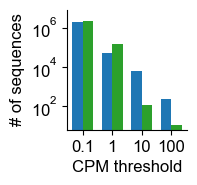

In [13]:
# Define absolute axis size in inches
axis_width = 1.2  # Width in inches
axis_height = 1.2  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

width=0.35
# Plot
g1 = ax.bar(x - width/2, df_res['structured'], width, label='Structured', color='tab:blue')
g2 = ax.bar(x + width/2, df_res['random'], width, label='Random', color='tab:green')

plt.xticks(x, xticklabels)

plt.yscale('log')
plt.ylim(top=8000000)


plt.xlabel('CPM threshold')
plt.ylabel('# of sequences')

sns.despine()
plt.savefig('number_of_sequences_above_cutoff_strc_vs_ctrl.svg')

In [14]:
def seqDist(s1, s2):
    return sum([1 if b1 != b2 else 0 for b1, b2 in zip(s1, s2)])

In [15]:
thresholds

[0.1, 1, 10, 100]

To address this, for each of the CPM cutoffs in Figure 2g, can you please make a graph showing mutational distance from Aurora 2 on the x-axis and number of sequences above the CPM cutoff in the randomly mutagenized library (one curve) and the secondary structure library (a second curve) on the y-axis? Try both log and linear scales for the y-axis. We know from Figure 2g that the secondary structure library contains approximately 40 times more unique sequences with catalytic activity than the randomly mutagenized library. However, I want to see if the number changes if we sort by mutational distance from Aurora 2 (the best previously identified variant). Thank you. 

In [38]:
xs = []

for t in thresholds:

    df_strc_sub = df_strc[df_strc['cpm'] >= t]
    df_ctrl_sub = df_ctrl[df_ctrl['cpm'] >= t]
    
    # Compute distances from Aurora2
    strc_distances = [seqDist(s, aurora2) for s in df_strc_sub['varseq']]
    ctrl_distances = [seqDist(s, aurora2) for s in df_ctrl_sub['varseq']]
    
    vc_dists_strc = pd.Series(strc_distances).value_counts().sort_index()
    vc_dists_ctrl = pd.Series(ctrl_distances).value_counts().sort_index()

    xs.append([vc_dists_strc, vc_dists_ctrl])

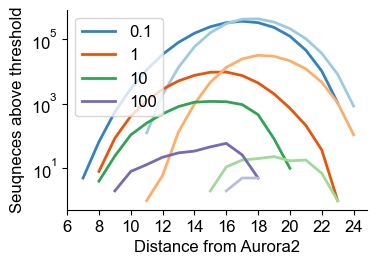

In [86]:
axis_width = 3  # Width in inches
axis_height = 2  # Height in inches
left_margin = 0.5
bottom_margin = 0.5
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([left_margin / fig_width, bottom_margin / fig_height, axis_width / fig_width, axis_height / fig_height])


for i in range(0, len(xs)):

    vc_strc, vc_ctrl = xs[i][0], xs[i][1]
    color_strc = plt.colormaps['tab20c'](i*4)
    color_ctrl = plt.colormaps['tab20c']((i*4)+2)
        
    plt.plot(vc_strc.index, vc_strc.values, color=color_strc, linewidth=2, label=thresholds[i])
    plt.plot(vc_ctrl.index, vc_ctrl.values, color=color_ctrl, linewidth=2)

plt.yscale('log')
plt.xticks([6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
plt.legend()
plt.xlabel('Distance from Aurora2')
plt.ylabel('Seuqneces above threshold')
sns.despine()
plt.savefig('seqs_above_threshold_vs_distance_from_au2.svg')